In [1]:
# cost functions
def cost_tube(a, b, c, d):
    return 25 + 0.1 * a + 0.1 * c

def cost_cycle_tube(a, b, c, d):
    return 23 + 0.3 * c + 0.1 * a

def cost_cycle(a, b, c, d):
    return 19 + 0.4 * b - 0.4 * c

def cost_bus(a, b, c, d):
    return 20 + 0.2 * d

# simulation function
def simulate_sequential_choice(total_users=100):
    a = 0  # tube
    b = 0  # cyclists
    c = 0  # cyclists within cycle + tube
    d = 0  # bus

    # go through each person
    for person in range(1, total_users + 1):
        # compute costs
        current_cost_tube = cost_tube(a+1, b, c, d)
        current_cost_cycle_tube = cost_cycle_tube(a, b+1, c+1, d)
        current_cost_cycle = cost_cycle(a, b+1, c, d)
        current_cost_bus = cost_bus(a, b, c, d+1)
        
        # create dictionary of costs
        costs = {
            "Tube": current_cost_tube,
            "Cycle + Tube": current_cost_cycle_tube,
            "Cycle": current_cost_cycle,
            "Bus": current_cost_bus,
        }
        # find the minimum cost
        chosen_route = min(costs, key=costs.get)

        # update the user costs
        if chosen_route == "Tube":
            a += 1
        elif chosen_route == "Cycle + Tube":
            c += 1  # users choosing cycle + tube
            b += 1  # add to cycle count
        elif chosen_route == "Cycle":
            b += 1
        elif chosen_route == "Bus":
            d += 1

    # final costs
    final_cost_tube = cost_tube(a, b, c, d)
    final_cost_cycle_tube = cost_cycle_tube(a, b, c, d)
    final_cost_cycle = cost_cycle(a, b, c, d)
    final_cost_bus = cost_bus(a, b, c, d)
    
    # output display of users and costs
    return {
        "Users on Tube": a,
        "Users on Cycle": b,
        "Users on Cycle + Tube": c, 
        "Users on Bus": d,
        "Final Costs": {
            "Tube": final_cost_tube,
            "Cycle + Tube": final_cost_cycle_tube,
            "Cycle": final_cost_cycle,
            "Bus": final_cost_bus,
        }
    }

# run simulation
results = simulate_sequential_choice()
print("Final Route Allocations:")
for route, users in results.items():
    if route != "Final Costs":
        print(f"{route}: {users:.2f}")
print("\nFinal Costs:")
for route, cost in results["Final Costs"].items():
    print(f"{route}: {cost:.2f}")

Final Route Allocations:
Users on Tube: 26.00
Users on Cycle: 32.00
Users on Cycle + Tube: 9.00
Users on Bus: 42.00

Final Costs:
Tube: 28.50
Cycle + Tube: 28.30
Cycle: 28.20
Bus: 28.40


In [2]:
# cost functions
def cost_tube(a, b, c, d):
    return 25 + 0.1 * a + 0.1 * c

def cost_cycle_tube(a, b, c, d):
    return 23 + 0.3 * c + 0.1 * a

def cost_cycle(a, b, c, d):
    return 19 + 0.4 * b - 0.4 * c

def cost_bus(a, b, c, d):
    return 20 + 0.2 * d

# simulation function
def simulate_sequential_choice(total_users=100):
    a = 0  # tube
    b = 0  # cyclists
    c = 0  # cyclists within cycle + tube
    d = 0  # bus

    # go through each person
    for person in range(1, total_users + 1):
        # compute costs
        current_cost_cycle_tube = cost_cycle_tube(a, b+1, c+1, d)
        current_cost_tube = cost_tube(a+1, b, c, d)
        current_cost_cycle = cost_cycle(a, b+1, c, d)
        current_cost_bus = cost_bus(a, b, c, d+1)
        
        # create dictionary of costs
        costs = {
            # swap methods around to attain other equilibria
            "Cycle + Tube": current_cost_cycle_tube,
            "Tube": current_cost_tube,
            "Cycle": current_cost_cycle,
            "Bus": current_cost_bus,
        }
        # find the minimum cost
        chosen_route = min(costs, key=costs.get)

        # update the user costs
        if chosen_route == "Cycle + Tube":
            c += 1  # users choosing cycle + tube
            b += 1  # add to cycle count
        elif chosen_route == "Tube":
            a += 1
        elif chosen_route == "Cycle":
            b += 1
        elif chosen_route == "Bus":
            d += 1

    # final costs
    final_cost_tube = cost_tube(a, b, c, d)
    final_cost_cycle_tube = cost_cycle_tube(a, b, c, d)
    final_cost_cycle = cost_cycle(a, b, c, d)
    final_cost_bus = cost_bus(a, b, c, d)
    
    # output display of users and costs
    return {
        "Users on Tube": a,
        "Users on Cycle": b, 
        "Users on Cycle + Tube": c, 
        "Users on Bus": d,
        "Final Costs": {
            "Tube": final_cost_tube,
            "Cycle + Tube": final_cost_cycle_tube,
            "Cycle": final_cost_cycle,
            "Bus": final_cost_bus,
        }
    }

# run simulation
results = simulate_sequential_choice()
print("Final Route Allocations:")
for route, users in results.items():
    if route != "Final Costs":
        print(f"{route}: {users:.2f}")
print("\nFinal Costs:")
for route, cost in results["Final Costs"].items():
    print(f"{route}: {cost:.2f}")

Final Route Allocations:
Users on Tube: 25.00
Users on Cycle: 33.00
Users on Cycle + Tube: 10.00
Users on Bus: 42.00

Final Costs:
Tube: 28.50
Cycle + Tube: 28.50
Cycle: 28.20
Bus: 28.40


In [6]:
# cost functions
def cost_bus_cycle(a, b, c, d):
    return 1.75 + (0.025*(a + c))

def cost_cycle_cycle(a, b, c, d):
    return ((a + b + 2*c) * 0.025) +0.5

def cost_cycle_bus(a, b, c, d):
    return 1.75 + (0.025*(b + c))

def cost_tube(a, b, c, d):
    return 2.25 + 0.025*d

# simulation function
def simulate_sequential_choice_with_adjustment(total_users=100):
    a = 0  # bus then cycle
    b = 0  # cycle then bus
    c = 0  # cycle whole way
    d = 0  # tube
    user_routes = []  # store which route each user chose

    # go through each person
    for person in range(1, total_users + 1):
        # compute costs
        current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
        current_cost_cycle_cycle = cost_cycle_cycle(a, b, c + 1, d)
        current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
        current_cost_tube = cost_tube(a, b, c, d + 1)
        
        # create dictionary of costs
        costs = {
            "Bus + Cycle": current_cost_bus_cycle,
            "Cycle": current_cost_cycle_cycle,
            "Cycle + Bus": current_cost_cycle_bus,
            "Tube": current_cost_tube,
        }
        # find the minimum cost
        chosen_route = min(costs, key=costs.get)

        # update the user counts
        if chosen_route == "Bus + Cycle":
            a += 1
        elif chosen_route == "Cycle":
            c += 1
        elif chosen_route == "Cycle + Bus":
            b += 1
        elif chosen_route == "Tube":
            d += 1

        # track the chosen route for adjustments
        user_routes.append(chosen_route)

    # adjustment
    # a, b, c, d = 0, 0, 0, 0  # reset counts
    for route in user_routes:
        if route == "Bus + Cycle":
            a -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_cycle = cost_cycle_cycle(a, b, c + 1 , d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1 , c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)

            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle": current_cost_cycle_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)
        elif route == "Cycle":
            c -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_cycle = cost_cycle_cycle(a, b, c+1, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1 , c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)
            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle": current_cost_cycle_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)
        elif route == "Cycle + Bus":
            b -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_cycle = cost_cycle_cycle(a, b, c + 1, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)
            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle": current_cost_cycle_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)
        elif route == "Tube":
            d -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_cycle = cost_cycle_cycle(a, b, c + 1, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)
            
            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle": current_cost_cycle_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)

        # update the user count for the chosen route
        if chosen_route == "Bus + Cycle":
            a += 1
        elif chosen_route == "Cycle":
            c += 1
        elif chosen_route == "Cycle + Bus":
            b += 1
        elif chosen_route == "Tube":
            d += 1

    # recalculate final costs
    final_cost_bus_cycle = cost_bus_cycle(a, b, c, d)
    final_cost_cycle_cycle = cost_cycle_cycle(a, b, c, d)
    final_cost_cycle_bus = cost_cycle_bus(a, b, c, d)
    final_cost_tube = cost_tube(a, b, c, d)

    return {
        "Users on Bus + Cycle": a,
        "Users on Cycle": c,
        "Users on Cycle + Bus": b,
        "Users on Tube": d,
        "Final Costs": {
            "Bus + Cycle": final_cost_bus_cycle,
            "Cycle": final_cost_cycle_cycle,
            "Cycle + Bus": final_cost_cycle_bus,
            "Tube": final_cost_tube
        }
    }

# run simulation
results = simulate_sequential_choice_with_adjustment()
print("Final Route Allocations:")
for route, users in results.items():
    if route != "Final Costs":
        print(f"{route}: {users:.2f}")
print("\nFinal Costs:")
for route, cost in results["Final Costs"].items():
    print(f"{route}: {cost:.2f}")

Final Route Allocations:
Users on Bus + Cycle: 22.00
Users on Cycle: 28.00
Users on Cycle + Bus: 21.00
Users on Tube: 29.00

Final Costs:
Bus + Cycle: 3.00
Cycle: 2.98
Cycle + Bus: 2.98
Tube: 2.98


In [3]:
# (one without cycle route)
# cost functions
def cost_bus_cycle(a, b, c, d):
    return a*0.025 + 1.75

def cost_cycle_bus(a, b, c, d):
    return b*0.025 + 1.75

def cost_tube(a, b, c, d):
    return 2.25 + d*0.025

# simulation function
def simulate_sequential_choice_with_adjustment(total_users=100):
    a = 0  # bus then cycle
    b = 0  # cycle then bus
    c = 0
    d = 0  # tube
    user_routes = []  # store which route each user chose

    # go through each person
    for person in range(1, total_users + 1):
        # compute costs
        current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
        current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
        current_cost_tube = cost_tube(a, b, c, d + 1)
        
        # create dictionary of costs
        costs = {
            "Bus + Cycle": current_cost_bus_cycle,
            "Cycle + Bus": current_cost_cycle_bus,
            "Tube": current_cost_tube,
        }
        # find minimum of costs
        chosen_route = min(costs, key=costs.get)

        # update user costs
        if chosen_route == "Bus + Cycle":
            a += 1
        elif chosen_route == "Cycle + Bus":
            b += 1
        elif chosen_route == "Tube":
            d += 1

        # track the chosen route
        user_routes.append(chosen_route)

    # adjustment
    # a, b, c, d = 0, 0, 0, 0  # Reset counts
    for route in user_routes:
        if route == "Bus + Cycle":
            a -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1 , c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)

            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)
            
        elif route == "Cycle + Bus":
            b -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)
            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)
        elif route == "Tube":
            d -= 1
            # recalculate costs for each user
            current_cost_bus_cycle = cost_bus_cycle(a + 1, b, c, d)
            current_cost_cycle_bus = cost_cycle_bus(a, b + 1, c, d)
            current_cost_tube = cost_tube(a, b, c, d + 1)
            
            costs = {
                "Bus + Cycle": current_cost_bus_cycle,
                "Cycle + Bus": current_cost_cycle_bus,
                "Tube": current_cost_tube,
            }
            chosen_route = min(costs, key=costs.get)

        # update user counts
        if chosen_route == "Bus + Cycle":
            a += 1
        elif chosen_route == "Cycle + Bus":
            b += 1
        elif chosen_route == "Tube":
            d += 1

    # recalculate final costs
    final_cost_bus_cycle = cost_bus_cycle(a, b, c, d)
    final_cost_cycle_bus = cost_cycle_bus(a, b, c, d)
    final_cost_tube = cost_tube(a, b, c, d)

    return {
        "Users on Bus + Cycle": a,
        "Users on Cycle + Bus": b,
        "Users on Tube": d,
        "Final Costs": {
            "Bus + Cycle": final_cost_bus_cycle,
            "Cycle + Bus": final_cost_cycle_bus,
            "Tube": final_cost_tube
        }
    }

# run simulation
results = simulate_sequential_choice_with_adjustment()
print("Final Route Allocations:")
for route, users in results.items():
    if route != "Final Costs":
        print(f"{route}: {users:.2f}")
print("\nFinal Costs:")
for route, cost in results["Final Costs"].items():
    print(f"{route}: {cost:.2f}")

Final Route Allocations:
Users on Bus + Cycle: 40.00
Users on Cycle + Bus: 40.00
Users on Tube: 20.00

Final Costs:
Bus + Cycle: 2.75
Cycle + Bus: 2.75
Tube: 2.75


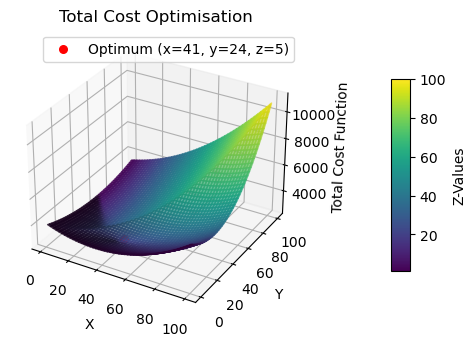

Optimal solution: x=41, y=24, z=5 with minimum value=2807.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# total user costs
def objective(x, y, z):
    return 10*x + (x + z)*(15 + 0.1*(x + z)) + 5*y + z*(3 + 0.2*z) + (y - z)*(14 + 0.4*(y - z)) + (100 - x - y)*(40 - 0.2*x - 0.2*y)

# brute-force search for the minimum
def find_minimum():
    # store min_value and the corresponding x,y,z
    min_value = float('inf') # infinitely large value
    best_x, best_y, best_z = 0, 0, 0
    # store all values
    values = []
    # loop over all possible values for x, y, z
    for x in range(1, 101):
        for y in range(1, 101):
            for z in range(1, y + 1): # z <= y
                value = objective(x, y, z)
                values.append((x, y, z, value))
                # update the minimum value and best solution
                if value < min_value:
                    min_value = value
                    best_x, best_y, best_z = x, y, z
    return best_x, best_y, best_z, min_value, values

# find minimum
best_x, best_y, best_z, min_value, values = find_minimum()
x_vals = [v[0] for v in values]
y_vals = [v[1] for v in values]
z_vals = [v[2] for v in values]
f_vals = [v[3] for v in values]

# meshgrid for plot
x_range = np.linspace(1, 100, 100)
y_range = np.linspace(1, 100, 100)
X, Y = np.meshgrid(x_range, y_range)

# calculate z values
Z = np.zeros_like(X)
C = np.zeros_like(X)  # color values
for i in range(len(x_range)):
    for j in range(len(y_range)):
        z_min = int(max(1, min(x_range[i], y_range[j])))  # z <= y, z >= 1
        Z[i, j] = objective(x_range[i], y_range[j], z_min)
        C[i, j] = z_min  # use the z-value as the color

# 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot surface using z-values as colors
surf = ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(C / np.max(C)), edgecolor='none', alpha=0.7)

# add a color bar for z-values with padding
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(C)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, pad=0.2)
cbar.set_label("Z-Values")

# highlight optimal point
ax.scatter(best_x, best_y, min_value, color='red', s=30, label=f"Optimum (x={best_x}, y={best_y}, z={best_z})", marker='o')

# plot spacing
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Total Cost Function')
ax.set_title('Total Cost Optimisation')
ax.legend()
plt.show()

# output the optimal solution
print(f"Optimal solution: x={best_x}, y={best_y}, z={best_z} with minimum value={min_value}")